# Chapter 6 - Decision Tree Model

## Project: Credit Risk Score.

In [1]:
# Importing Python Packages. 

# Data Manipulation. 
import pandas as pd 
import numpy as np

# Data Visualization Packages. 
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Gathering Package. 
import wget 

# Data preparation packages.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

# Model Training Packages.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Other
from IPython.display import display 
%matplotlib inline

## Data Gathering.

In [2]:
# Data url link
url = 'https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv'

# Downloading data with wget.
# wget.download(url, 'data/credit_scoring.csv')

In [3]:
# Loading dataset.
credit_score = pd.read_csv('data/credit_scoring.csv')

# Viewing 
credit_score.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


## Data Cleaning & Preparation. 

In [4]:
# Changing header to small cap.
credit_score.columns = credit_score.columns.str.replace(' ', '_').str.lower()

# Checking data columns names.
credit_score.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [5]:
credit_score.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [6]:
# Replacing numbers with values.
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

credit_score.status = credit_score.status.map(status_values)

# Check header. 
credit_score.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
# Converting Values to str values. 
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignorfe',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

credit_score.home = credit_score.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

credit_score.marital = credit_score.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

credit_score.records = credit_score.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

credit_score.job = credit_score.job.map(job_values)

In [8]:
# Checking result.
credit_score.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
# Statistic overview.
credit_score.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [10]:
# Removing Outlier with None. 

# Removing outliers for Debt column. 
credit_score.debt.replace(99999999, np.nan, inplace = True)

# Removing outlier for assets column.
credit_score.assets.replace(99999999, np.nan, inplace = True)

# Removing outlier for income column.
credit_score.income.replace(99999999, np.nan, inplace = True)

# Veiwing changes. 
credit_score[['income', 'debt', 'assets']].max()

income       959.0
debt       30000.0
assets    300000.0
dtype: float64

In [11]:
# Remove rows with unknow status.
credit_score = credit_score[credit_score.status != 'unk']

# Show result.
credit_score.status.value_counts(normalize = True)

ok         0.718455
default    0.281545
Name: status, dtype: float64

In [12]:
# Splitting dataset. 
# Full_Train & Test Dataset.
credit_train_full, credit_test = train_test_split(credit_score, test_size= 0.2, random_state = 10)

# Train & Validation Dataset.
credit_train, credit_val = train_test_split(credit_train_full, test_size = 0.25, random_state = 10)

# Reset index values. 
credit_train_full = credit_train_full.reset_index(drop=True)
credit_test = credit_test.reset_index(drop = True)
credit_train = credit_train.reset_index(drop = True)
credit_val = credit_val.reset_index(drop = True)

# Extract Dependent feature.
y_train = (credit_train['status']== 'ok').astype(int).values
y_test = (credit_test['status'] == 'ok').astype(int).values
y_val = (credit_val['status'] == 'ok').astype(int).values

# Delete dependent columns from dataset. 
del credit_train['status']
del credit_test['status']
del credit_val['status']

# Show all dataset. 
display(credit_train)
display(credit_test)
display(credit_val)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,8,owner,36,53,married,no,fixed,45,254.0,6000.0,0.0,350,575
1,25,owner,60,63,married,no,freelance,60,70.0,10000.0,0.0,700,925
2,3,owner,48,30,married,no,fixed,75,88.0,6000.0,400.0,1200,1796
3,3,rent,60,48,married,no,others,77,24.0,0.0,0.0,1700,1803
4,0,private,48,56,married,no,others,35,84.0,4500.0,50.0,700,940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,1,rent,60,27,single,no,fixed,44,88.0,0.0,0.0,1000,1092
2668,13,owner,48,54,married,yes,fixed,45,90.0,2500.0,0.0,1000,1198
2669,2,owner,60,57,single,no,freelance,35,50.0,15000.0,0.0,960,962
2670,23,owner,48,60,married,no,fixed,35,80.0,3000.0,0.0,1150,1242


,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,parents,18,42,married,no,freelance,75,276.0,1500.0,0.0,750,1758
1,0,owner,48,43,married,no,partime,75,71.0,14000.0,0.0,1100,1660
2,5,parents,60,21,single,no,fixed,45,56.0,0.0,0.0,1400,2067
3,12,owner,48,35,married,no,fixed,45,125.0,6000.0,0.0,350,1511
4,2,owner,30,38,married,no,fixed,75,159.0,11000.0,0.0,1280,1289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,owner,60,33,married,no,fixed,60,198.0,4600.0,3500.0,700,760
887,3,owner,30,37,married,no,fixed,75,80.0,4000.0,0.0,650,1270
888,0,owner,60,36,married,no,partime,90,113.0,4000.0,198.0,400,790
889,0,other,36,52,married,no,freelance,45,0.0,0.0,0.0,500,1050


,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,4,owner,48,36,married,no,fixed,60,133.0,4000.0,0.0,1000,1595
1,4,owner,60,26,married,no,fixed,45,152.0,4000.0,1200.0,950,1050
2,1,private,24,31,married,no,fixed,60,140.0,2000.0,500.0,1100,1600
3,18,owner,60,49,widow,no,fixed,35,117.0,4000.0,0.0,1000,1057
4,14,rent,48,28,married,no,fixed,60,146.0,0.0,0.0,1450,1474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5,owner,42,32,married,no,fixed,60,96.0,6000.0,800.0,1700,2349
887,23,owner,60,50,married,no,fixed,45,90.0,3000.0,0.0,950,1101
888,3,owner,24,29,married,no,fixed,60,225.0,9000.0,0.0,600,980
889,3,rent,60,24,single,no,fixed,60,147.0,0.0,0.0,1050,1351


## Training Model: Decision Tree.

In [13]:
# Converting data to dict.
train_dict = credit_train.fillna(0).to_dict(orient = 'records')

# Check result.
train_dict

[{'seniority': 8,
  'home': 'owner',
  'time': 36,
  'age': 53,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 45,
  'income': 254.0,
  'assets': 6000.0,
  'debt': 0.0,
  'amount': 350,
  'price': 575},
 {'seniority': 25,
  'home': 'owner',
  'time': 60,
  'age': 63,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 60,
  'income': 70.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 700,
  'price': 925},
 {'seniority': 3,
  'home': 'owner',
  'time': 48,
  'age': 30,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 88.0,
  'assets': 6000.0,
  'debt': 400.0,
  'amount': 1200,
  'price': 1796},
 {'seniority': 3,
  'home': 'rent',
  'time': 60,
  'age': 48,
  'marital': 'married',
  'records': 'no',
  'job': 'others',
  'expenses': 77,
  'income': 24.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1700,
  'price': 1803},
 {'seniority': 0,
  'home': 'private',
  'time': 48,
  'age': 56,
  'm

In [14]:
# Creating Dict Vectorizer instance.
dv = DictVectorizer(sparse = False)

# Training and transforming data
x_train = dv.fit_transform(train_dict)

# Show result 
print(x_train, '\n')

# Show feature names. 
print(dv.get_feature_names())


[[5.30e+01 3.50e+02 6.00e+03 ... 0.00e+00 8.00e+00 3.60e+01]
 [6.30e+01 7.00e+02 1.00e+04 ... 0.00e+00 2.50e+01 6.00e+01]
 [3.00e+01 1.20e+03 6.00e+03 ... 0.00e+00 3.00e+00 4.80e+01]
 ...
 [5.70e+01 9.60e+02 1.50e+04 ... 0.00e+00 2.00e+00 6.00e+01]
 [6.00e+01 1.15e+03 3.00e+03 ... 0.00e+00 2.30e+01 4.80e+01]
 [3.70e+01 6.00e+02 2.00e+04 ... 0.00e+00 1.10e+01 1.80e+01]] 

['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignorfe', 'home=other', 'home=owner', 'home=parents', 'home=private', 'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance', 'job=others', 'job=partime', 'marital=divorced', 'marital=married', 'marital=separated', 'marital=single', 'marital=unk', 'marital=widow', 'price', 'records=no', 'records=yes', 'seniority', 'time']


C:\Users\User1\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
# Training Decision Tree model. 
dtm = DecisionTreeClassifier()

# Train model with training dataset. 
dtm.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
# Transform data to dict formate. 
val_dict = credit_val.fillna(0).to_dict(orient = 'records')

# Transform data to vectors. 
x_val = dv.transform(val_dict)

# Show result. 
x_val

array([[3.60e+01, 1.00e+03, 4.00e+03, ..., 0.00e+00, 4.00e+00, 4.80e+01],
       [2.60e+01, 9.50e+02, 4.00e+03, ..., 0.00e+00, 4.00e+00, 6.00e+01],
       [3.10e+01, 1.10e+03, 2.00e+03, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       ...,
       [2.90e+01, 6.00e+02, 9.00e+03, ..., 0.00e+00, 3.00e+00, 2.40e+01],
       [2.40e+01, 1.05e+03, 0.00e+00, ..., 0.00e+00, 3.00e+00, 6.00e+01],
       [3.70e+01, 7.00e+02, 3.50e+03, ..., 0.00e+00, 1.40e+01, 6.00e+01]])

In [17]:
# Testing the model with the validation dataset.
y_predi = dtm.predict_proba(x_val)[:, 1]

# Showing result. 
y_predi

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1.

In [18]:
# Evaluate model strenth. 
roc_score = roc_auc_score(y_predi, y_val)
roc_score

0.654612990724371

In [19]:
# Converting data to data to dict. 
train_dict = credit_train.fillna(0).to_dict(orient = 'records')

# Converting dict data to vector. 
x_train = dv.transform(train_dict)

# Testing model with training dataset. 
y_predi = dtm.predict_proba(x_train)[:, 1]

# Evaluting model prediction. 
roc_score = roc_auc_score(y_predi, y_train)

# Show score result. 
roc_score

1.0

#### Observation: 
The roc auc score of 1 show us that our model is overfitting. 

### Using the max depth and min_sample_leaf parameter.


In [20]:
# Creating instanse of model.
model = DecisionTreeClassifier(max_depth = 3, random_state = 10, min_samples_leaf = 30 )

# Training model with training data.
model.fit(x_train, y_train)

# Evaluate model.
y_predi = model.predict_proba(x_val)[:, 1]

# Measure effectiveness.
auc_score = roc_auc_score(y_val, y_predi)

# Show result. 
print(y_predi)
print('\n\n',f"ROC_AUC_SCORE --> {auc_score}")

[0.91337907 0.91337907 0.68160377 0.91337907 0.91337907 0.68160377
 0.91337907 0.70700637 0.91337907 0.64948454 0.68160377 0.70700637
 0.15740741 0.68160377 0.91337907 0.68160377 0.64948454 0.70700637
 0.70700637 0.68160377 0.46428571 0.70700637 0.91337907 0.91337907
 0.46428571 0.91337907 0.91337907 0.38834951 0.91337907 0.4
 0.91337907 0.91337907 0.68160377 0.91337907 0.70700637 0.91337907
 0.91337907 0.91337907 0.68160377 0.91337907 0.91337907 0.91337907
 0.38834951 0.91337907 0.15740741 0.68160377 0.46428571 0.91337907
 0.91337907 0.91337907 0.91337907 0.91337907 0.91337907 0.46428571
 0.91337907 0.91337907 0.91337907 0.70700637 0.91337907 0.46428571
 0.70700637 0.38834951 0.64948454 0.38834951 0.91337907 0.68160377
 0.91337907 0.91337907 0.68160377 0.91337907 0.70700637 0.91337907
 0.68160377 0.68160377 0.91337907 0.68160377 0.91337907 0.68160377
 0.68160377 0.38834951 0.91337907 0.68160377 0.68160377 0.46428571
 0.91337907 0.91337907 0.91337907 0.91337907 0.68160377 0.91337907
 0

In [64]:
# Depth and Sample levels.
depth = [2, 3,  4, 6, 7, 8, 10, 15, 20, 30, 40, 50, None]

# Saved model output 
result = []

# Testing different max_depth level. 

for d in depth: 
    print('Creating instanse of Decision Tree model', '\n')
    model = DecisionTreeClassifier(max_depth = d, random_state = 10)
    
    print(f'Training Model with {d} Depth level.', '\n')
    model.fit(x_train, y_train)
    
    print('Evaluating model with validation data.', '\n')
    y_predic = model.predict_proba(x_val)[:, 1]
    
    print('Calculating Model Effectiveness', '\n')    
    auc_score = roc_auc_score(y_val, y_predic)
    
    print('Appending result ot Result-list', '\n\n')    
    result.append((d, auc_score))

Creating instanse of Decision Tree model 

Training Model with 2 Depth level. 

Evaluating model with validation data. 

Calculating Model Effectiveness 

Appending result ot Result-list 


Creating instanse of Decision Tree model 

Training Model with 3 Depth level. 

Evaluating model with validation data. 

Calculating Model Effectiveness 

Appending result ot Result-list 


Creating instanse of Decision Tree model 

Training Model with 4 Depth level. 

Evaluating model with validation data. 

Calculating Model Effectiveness 

Appending result ot Result-list 


Creating instanse of Decision Tree model 

Training Model with 6 Depth level. 

Evaluating model with validation data. 

Calculating Model Effectiveness 

Appending result ot Result-list 


Creating instanse of Decision Tree model 

Training Model with 7 Depth level. 

Evaluating model with validation data. 

Calculating Model Effectiveness 

Appending result ot Result-list 


Creating instanse of Decision Tree model 

Trainin

In [65]:
# Result dataframe. 
depth_auc = pd.DataFrame(result, columns = ['depth', 'auc_score'])

# Show result.
depth_auc

,depth,auc_score
0,2.0,0.696677
1,3.0,0.740112
2,4.0,0.774072
3,6.0,0.797629
4,7.0,0.801145
5,8.0,0.800975
6,10.0,0.801594
7,15.0,0.801594
8,20.0,0.801594
9,30.0,0.801594


In [61]:
# Testing different min_samples_leaf level. 
samples_leaf = [3, 5, 8, 10, 20, 50, 55, 57, 59, 60, 70, 80, 90, 100, 150, 200]

# Pickt the best max_depth level.
depth_level = 7

# Result. 
result = []

for s in samples_leaf: 
    print('Creating instanse of Decision Tree model', '\n')
    model = DecisionTreeClassifier(max_depth = depth_level, min_samples_leaf = s, random_state = 10)
    
    print(f'Training Model with {d} sample leaf level.', '\n')
    model.fit(x_train, y_train)
    
    print('Evaluating model with validation data.', '\n')
    y_predic = model.predict_proba(x_val)[:, 1]
    
    print('Calculating Model Effectiveness', '\n')    
    auc_score = roc_auc_score(y_val, y_predic)
    
    print('Appending result ot Result-list', '\n\n')    
    result.append((s, auc_score))

Creating instanse of Decision Tree model 

Training Model with None sample leaf level. 

Evaluating model with validation data. 

Calculating Model Effectiveness 

Appending result ot Result-list 


Creating instanse of Decision Tree model 

Training Model with None sample leaf level. 

Evaluating model with validation data. 

Calculating Model Effectiveness 

Appending result ot Result-list 


Creating instanse of Decision Tree model 

Training Model with None sample leaf level. 

Evaluating model with validation data. 

Calculating Model Effectiveness 

Appending result ot Result-list 


Creating instanse of Decision Tree model 

Training Model with None sample leaf level. 

Evaluating model with validation data. 

Calculating Model Effectiveness 

Appending result ot Result-list 


Creating instanse of Decision Tree model 

Training Model with None sample leaf level. 

Evaluating model with validation data. 

Calculating Model Effectiveness 

Appending result ot Result-list 


Creat

In [62]:
# Result dataframe. 
sample_leaf_auc = pd.DataFrame(result, columns = ['samples_leaf', 'auc_score'])

# Show result.
sample_leaf_auc

,samples_leaf,auc_score
0,3,0.752704
1,5,0.762632
2,8,0.763853
3,10,0.770928
4,20,0.770082
5,50,0.796217
6,55,0.800519
7,57,0.801145
8,59,0.794562
9,60,0.791592


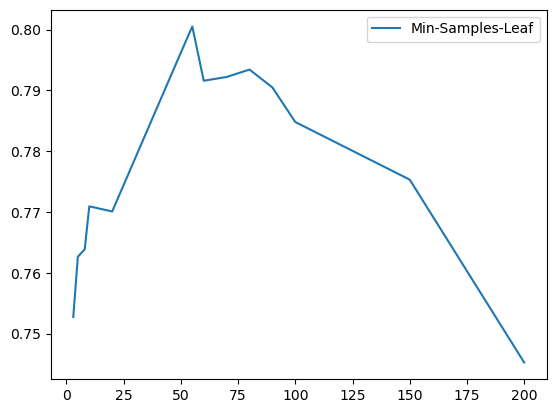

In [56]:
# Plotting Result. 
plt.plot(sample_leaf_auc.samples_leaf, sample_leaf_auc.auc_score, label = 'Min-Samples-Leaf')
plt.legend()
plt.show()

In [ ]:
# Testing different combination of verying 
# max depth and min sample leaf. 
for d in depth: 
    for s in samples_leaf: 
        